In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/anshika/Documents/SMS_SPAM_HAM_CLASSIFIER/data/spam.csv", encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

## DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
## drop last three columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [9]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
## renaming the columns
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
## label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df["Target"]=encoder.fit_transform(df["Target"])

In [14]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
## Missing Values
df.isnull().sum()

Target    0
Text      0
dtype: int64

 THERE IS NO MISSING VALUE IN THE DATASET

In [16]:
## CHECKING FOR DUPLICATE VALUES
df.duplicated().sum()

403

In [17]:
## remove duplicates
df=df.drop_duplicates(keep="first")

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## **EDA**

In [20]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

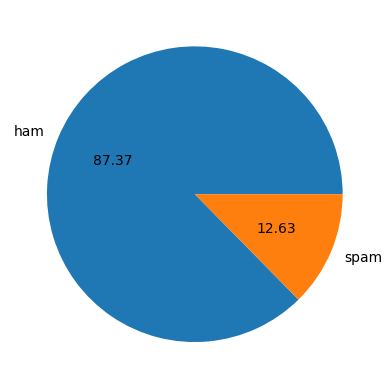

In [21]:
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%.2f")
plt.show()

In [22]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [23]:
import nltk

In [24]:
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [25]:
#print(df.columns)
print(type(df["Text"]))

<class 'pandas.core.series.Series'>


In [26]:
df["num_characters"]=df["Text"].apply(len)

C:\Users\anshika\AppData\Local\Temp\ipykernel_95320\435560048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"]=df["Text"].apply(len)


In [27]:
df

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [28]:
## No. of words
df["num_words"]=df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\anshika\AppData\Local\Temp\ipykernel_95320\3042462611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]=df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [29]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df["num_sentences"]=df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\anshika\AppData\Local\Temp\ipykernel_95320\2423611766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentences"]=df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [31]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
## for ham messages
df[df["Target"] ==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
## for spam messages
df[df["Target"] ==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

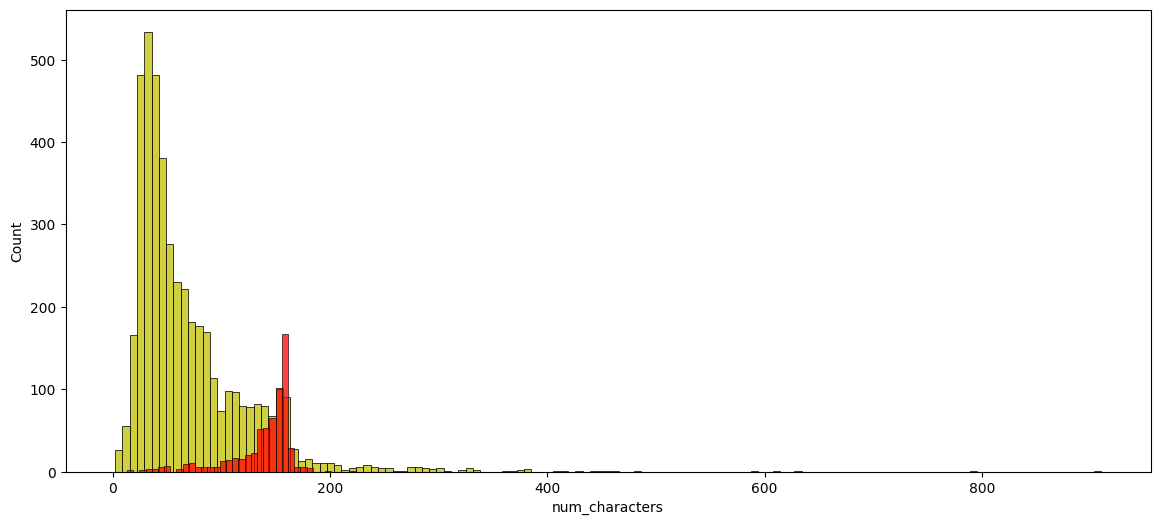

In [35]:
plt.figure(figsize=(14,6))
sns.histplot(df[df["Target"]==0]["num_characters"],color="y")
sns.histplot(df[df["Target"]==1]["num_characters"],color="r")

<Axes: xlabel='num_words', ylabel='Count'>

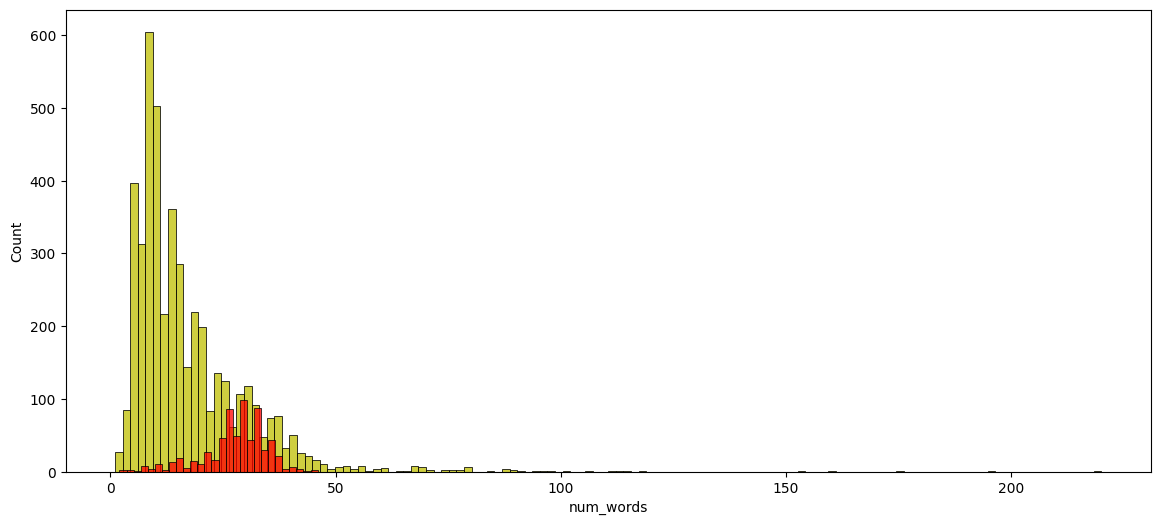

In [36]:
plt.figure(figsize=(14,6))
sns.histplot(df[df["Target"]==0]["num_words"],color="y")
sns.histplot(df[df["Target"]==1]["num_words"],color="r")

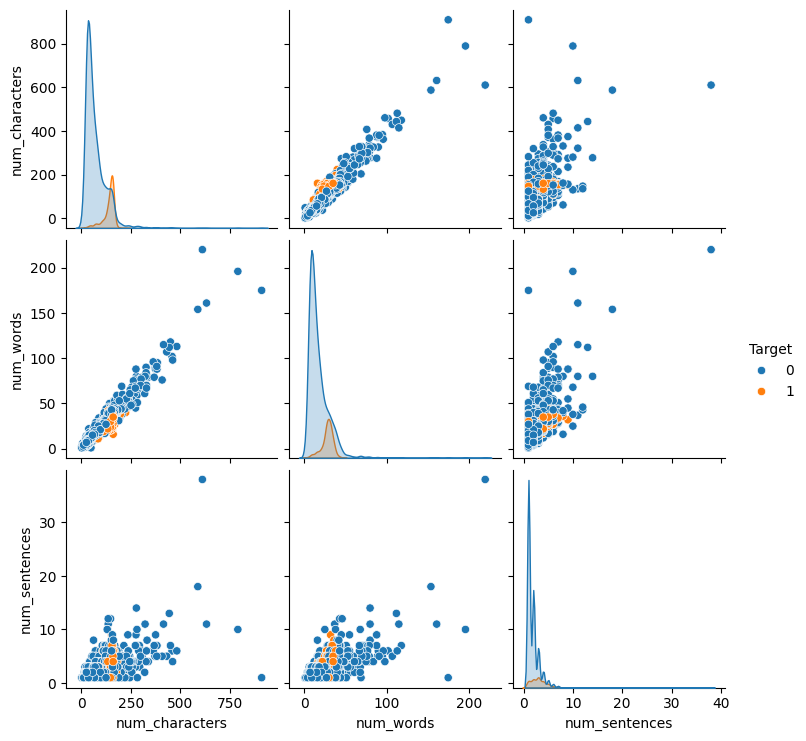

In [37]:
sns.pairplot(df,hue="Target")

## **DATA PREPROCESSING**

*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words
*   stemming





In [38]:
import nltk
import string
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [39]:
def transform_text(Text):
  Text=Text.lower()
  Text=nltk.word_tokenize(Text)
  y=[]
  for i in Text:
    if i.isalnum():
      y.append(i)

  Text=y[:]
  y.clear()

  stopwords = set(nltk.corpus.stopwords.words('english'))
  for i in Text:
        if i.lower() not in stopwords and i not in string.punctuation:
            y.append(i)
  Text =y[:]
  y.clear()
  for i in Text:
    y.append(ps.stem(i))

  return " ".join(y)

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [41]:
df["transformed_text"]=df["Text"].apply(transform_text)

C:\Users\anshika\AppData\Local\Temp\ipykernel_95320\2327792344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["Text"].apply(transform_text)


In [42]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [44]:
## spam  wordcloud
spam_wc=wc.generate(df[df["Target"]==1]["transformed_text"].str.cat(sep=" "))

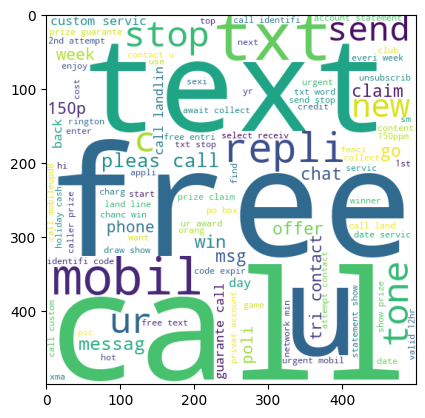

In [45]:
plt.imshow(spam_wc)

In [46]:
## ham wordcloud
ham_wc=wc.generate(df[df["Target"]==0]["transformed_text"].str.cat(sep=" "))

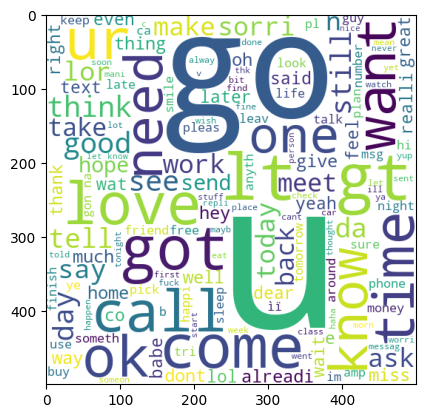

In [47]:
plt.imshow(ham_wc)

In [48]:
spam=[]
for msg in df[df["Target"]==1]["transformed_text"].tolist():
  for word in msg.split():
    spam.append(word)

In [49]:
len(spam)

9939

In [50]:
from collections import Counter


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40'),
  Text(45.0, 0, '45')])

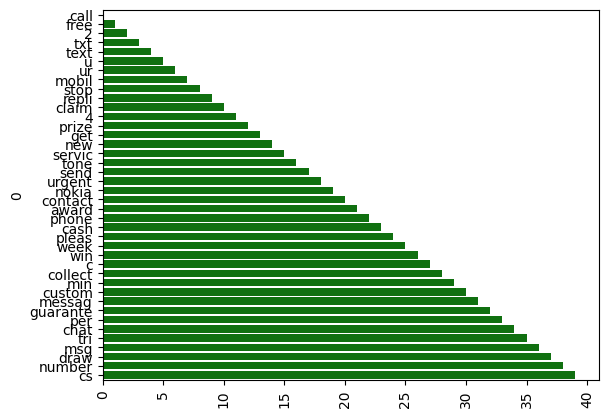

In [51]:

sns.barplot(pd.DataFrame(Counter(spam).most_common(40))[0],color="g")

plt.xticks(rotation="vertical")

In [52]:
ham=[]
for msg in df[df["Target"]==0]["transformed_text"].tolist():
  for word in msg.split():
    ham.append(word)

In [53]:
len(ham)

35404

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40'),
  Text(45.0, 0, '45')])

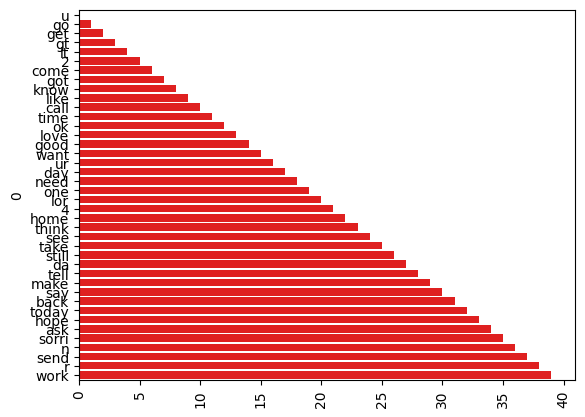

In [54]:
sns.barplot(pd.DataFrame(Counter(ham).most_common(40))[0],color="r")

plt.xticks(rotation="vertical")

## **MODEL BUILDING**

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [56]:
X= cv.fit_transform(df["transformed_text"]).toarray()

In [57]:
X.shape

(5169, 6708)

In [58]:
y=df["Target"].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [64]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [65]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [66]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


**CHECKING FOR TfIDF VECTORIZER**

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [68]:
X= tfidf.fit_transform(df["transformed_text"]).toarray()

In [69]:
X.shape

(5169, 3000)

In [70]:
y=df["Target"].values

In [71]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [75]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [76]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [77]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


BY USING MNB, ACCURACY SCORE DECREASES BUT  PRECISION SCORE IS BETTER

In [78]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


SINCE PRECISION  SCORE IS VERY ACCURATE IN TERM OF MULTINOMIAL NAIVE BAYES BY USING TFIDF VECTORIZER.THEN WE CAN CHOOSE THIS MODEL

In [79]:
## CHECKING FOR OTHER MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [80]:
svc=SVC(kernel="sigmoid",gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver="liblinear",penalty="l1")
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [81]:
clfs={
    "SVC": svc,
    "KN":knc,
    "NB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "Bgc":bc,
    "GBDT":gbdt,
    "xgb":xgb
}

In [82]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

# Train the SVC classifier
accuracy, precision = train_classifier(svc, X_train, y_train, X_test, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.9758220502901354
Precision: 0.9747899159663865


In [83]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print("for",name)
  print("Accuracy=",current_accuracy)
  print("Precision=",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

for SVC
Accuracy= 0.9758220502901354
Precision= 0.9747899159663865
for KN
Accuracy= 0.9052224371373307
Precision= 1.0
for NB
Accuracy= 0.9709864603481625
Precision= 1.0
for DT
Accuracy= 0.9294003868471954
Precision= 0.8282828282828283
for LR
Accuracy= 0.9584139264990329
Precision= 0.9702970297029703
for RF
Accuracy= 0.9758220502901354
Precision= 0.9829059829059829


c:\Users\anshika\Documents\SMS_SPAM_HAM_CLASSIFIER\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


for AdaBoost
Accuracy= 0.960348162475822
Precision= 0.9292035398230089
for Bgc
Accuracy= 0.9584139264990329
Precision= 0.8682170542635659
for GBDT
Accuracy= 0.9468085106382979
Precision= 0.9191919191919192
for xgb
Accuracy= 0.9671179883945842
Precision= 0.9482758620689655


In [84]:
performance_df=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values("Precision",ascending=False)

In [85]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
4,LR,0.958414,0.970297
9,xgb,0.967118,0.948276
6,AdaBoost,0.960348,0.929204
8,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217
3,DT,0.929400,0.828283


In [86]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()

from sklearn.ensemble import VotingClassifier

In [87]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb)],voting='soft')

In [88]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [89]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.975


In [90]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb)]
final_estimator=RandomForestClassifier()

In [91]:
from sklearn.ensemble import StackingClassifier

In [92]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [93]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9461538461538461


In [97]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [96]:
import pickle

# Assuming vectorizer and model are already trained
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


In [101]:
import os
import pickle

# ✅ Correct save path: root-level artifacts/
os.makedirs("../artifacts", exist_ok=True)

with open("../artifacts/model.pkl", 'wb') as f:
    pickle.dump(mnb, f)

with open("../artifacts/vectorizer.pkl", 'wb') as f:
    pickle.dump(tfidf, f)
